# Тестовое задание на позицию “Аналитик данных”
Вышегородцев Александр Дмитриевич

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('train.csv')
except:
    print('There is no such file')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
display(data)
data.info()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


## Задание 1

 **а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?**

In [5]:
sub_category_counts = data['Sub-Category'].value_counts()

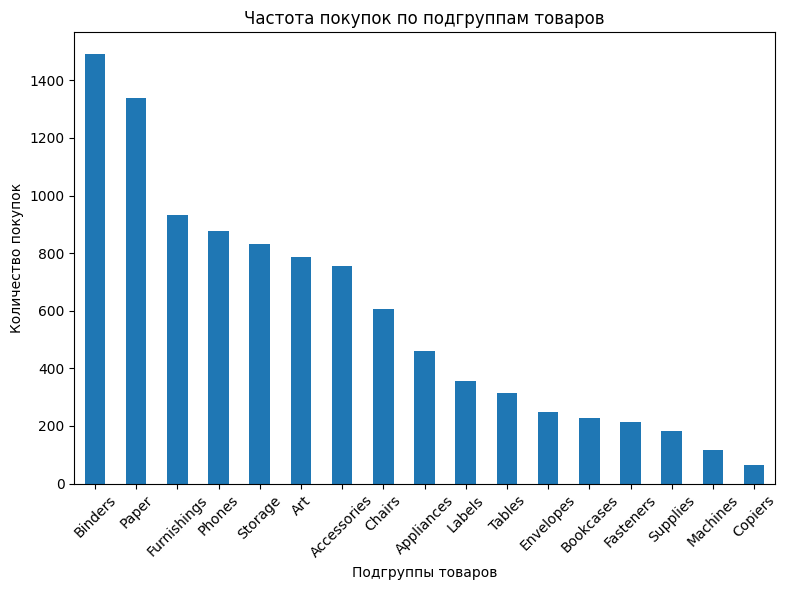

In [6]:
plt.figure(figsize=(8, 6))
sub_category_counts.plot(kind='bar')
plt.title('Частота покупок по подгруппам товаров')
plt.xlabel('Подгруппы товаров')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [7]:
top_categories = sub_category_counts.head(4).index.tolist()

print(f'Наиболее часто покупаемые подгруппы товаров - {top_categories}')

Наиболее часто покупаемые подгруппы товаров - ['Binders', 'Paper', 'Furnishings', 'Phones']


 **б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?**


In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

last_two_years = data['Order Date'].max() - pd.DateOffset(years=2)
two_years_data = data[data['Order Date'] >= last_two_years]

two_years_sub_category_counts = two_years_data['Sub-Category'].value_counts()

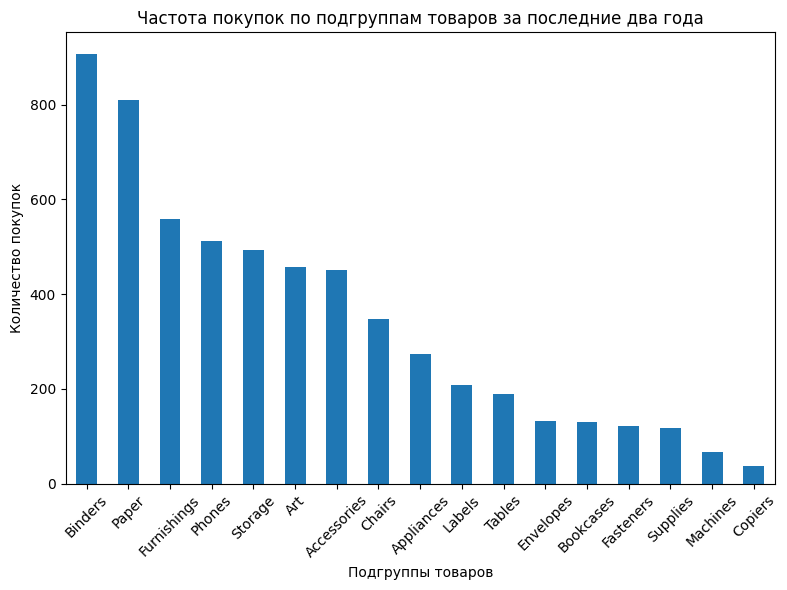

In [9]:
plt.figure(figsize=(8, 6))
two_years_sub_category_counts.plot(kind='bar')
plt.title('Частота покупок по подгруппам товаров за последние два года')
plt.xlabel('Подгруппы товаров')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
two_years_top_categories = two_years_sub_category_counts.head(4).index.tolist()

print(f'Наиболее часто покупаемые подгруппы товаров - {two_years_top_categories}')

Наиболее часто покупаемые подгруппы товаров - ['Binders', 'Paper', 'Furnishings', 'Phones']


 **в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?**

In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

last_year = data['Order Date'].max() - pd.DateOffset(years=1)
one_year_data = data[data['Order Date'] >= last_year]

one_year_sub_category_counts = one_year_data['Sub-Category'].value_counts()

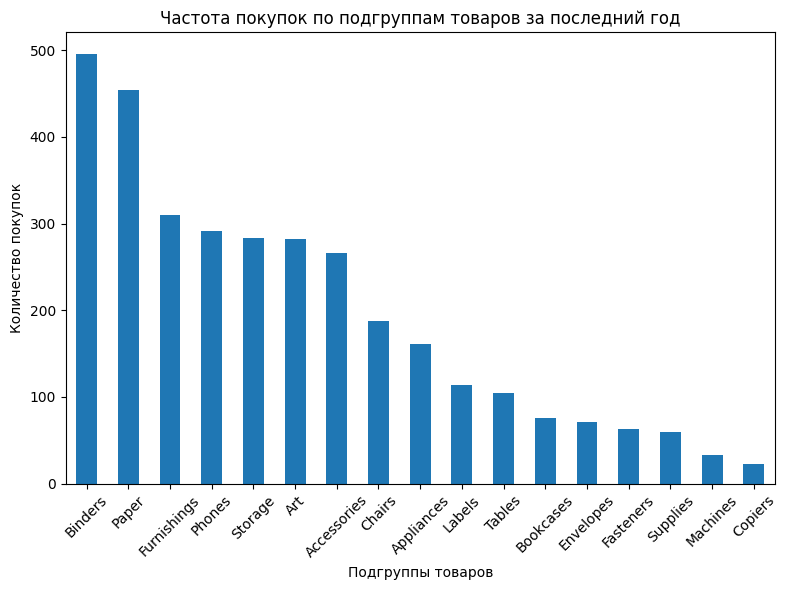

In [12]:
plt.figure(figsize=(8, 6))
one_year_sub_category_counts.plot(kind='bar')
plt.title('Частота покупок по подгруппам товаров за последний год')
plt.xlabel('Подгруппы товаров')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [13]:
one_year_top_categories = one_year_sub_category_counts.head(4).index.tolist()

print(f'Наиболее часто покупаемые подгруппы товаров - {one_year_top_categories}')

Наиболее часто покупаемые подгруппы товаров - ['Binders', 'Paper', 'Furnishings', 'Phones']


**Изучив графики, можно сделать вывод, что за последние четыре года тенденции в категории наиболее продаваемых товаров остались неизменными. Самым популярным товаром являются папки, за ними следуют бумага, мебель и телефоны.**

#  Задание 2

**Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. Однако любые другие решения приветствуются.**

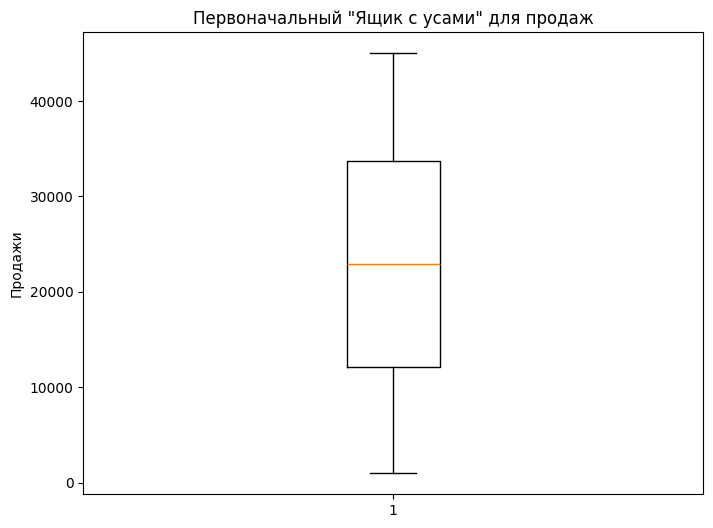

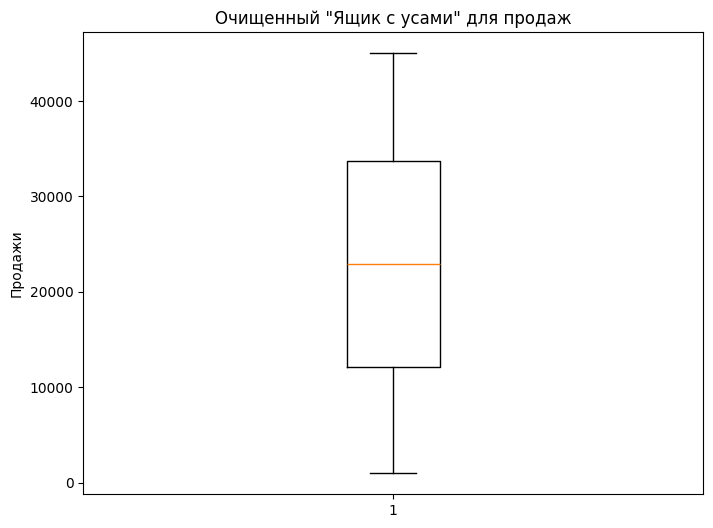

In [14]:
data['Sales'] = data['Sales'].str.replace(',', '.').astype(float)

plt.figure(figsize=(8, 6))
plt.boxplot(data['Sales'])
plt.title('Первоначальный "Ящик с усами" для продаж')
plt.ylabel('Продажи')
plt.show()

mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()

filtered_data = data[np.abs(data['Sales'] - mean_sales) <= (3 * std_sales)]

plt.figure(figsize=(8, 6))
plt.boxplot(filtered_data['Sales'])
plt.title('Очищенный "Ящик с усами" для продаж')
plt.ylabel('Продажи')
plt.show()

**Изучив график box plot, мы можем сделать вывод о том, что в данных по продажам отсутствуют аномальные значения.**

##  Задание 3

**Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.**


In [15]:

data['Sale_group'] = pd.cut(data['Sales'], bins=3, labels=['Маленькие', 'Средние', 'Высокие'])


grouped_data = data.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()


most_profitable_group = grouped_data.loc[grouped_data['Sales'].idxmax()]


print(f"Наиболее прибыльная группа:\n{most_profitable_group}")
print("\nОбщая группировка данных по регионам и категориям продаж:")
print(grouped_data)

Наиболее прибыльная группа:
Region          Калиниград
Sale_group         Высокие
Sales        37,360,269.02
Name: 5, dtype: object

Общая группировка данных по регионам и категориям продаж:
         Region Sale_group         Sales
0   Владивосток  Маленькие  7,862,072.55
1   Владивосток    Средние 20,641,092.62
2   Владивосток    Высокие 35,449,521.71
3    Калиниград  Маленькие  8,889,168.06
4    Калиниград    Средние 25,680,862.64
5    Калиниград    Высокие 37,360,269.02
6        Москва  Маленькие  4,287,843.36
7        Москва    Средние 12,648,114.08
8        Москва    Высокие 19,955,694.07
9          Урал  Маленькие  6,434,909.76
10         Урал    Средние 17,588,614.03
11         Урал    Высокие 27,835,063.91


C:\Users\alexw\AppData\Local\Temp\ipykernel_24608\1835992227.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()


**В качестве вывода можно отметить, что наиболее прибыльной группой является Калининград с высоким показателем Sale_group, демонстрирующий показатели Sales 37,360,269.02. В целом, Калининград показывает наилучшие результаты по всем типам sales_group, в то время как Москва занимает последнее место по всем группам продаж.**